# STA130 HW 5 pre lecture

### 1. The "first pre-lecture video" (above) describes hypothesis testing as addressing "an idea that can be tested", and the end of the video then discusses what our actual intended purpose in setting up a null hypothesis is. What is the key factor that makes the difference between ideas that can, and cannot be examined and tested statistically? What would you describe is the key "criteria" defining what a good null hypothesis is? And what is the difference between a null hypothesis and an alternative hypothesis in the context of hypothesis testing? Answer these questions with concise explanations in your own words.

    The key factor to check whether an idea can or cannot be examined statistically is the data. If there's enough data to conduct a statistical test for an idea, it can be examined with a statistical test. Otherwise, no. The key criteria of defining a good null hypothesis is whether the hypothesis is easy to be tested or not. The null hypothesis is the idea itself, mostly it refers to "no effects". The alternative hypothesis is the one other than the null hypothesis, mostly the negation of the null hypothesis. 

### 2. Towards the end of the "first pre-lecture" video (above) it is stated that, "It is important to note that outcomes of tests refer to the population parameter, rather than the sample statistic! As such, the result that we get is for the population." In terms of the distinctions between the concepts of $x_i\!$'s, $\bar x$, $\mu$, and $\mu_0$, how would you describe what the sentence above means? Explain this concisely in your own words for a "non-statsitical" audience, defining the technical statistical terminology you use in your answer.
    
    The hypothesis test is used to check whether the population, where you draw samples from, satisfy some characteristics given as the idea. The idea is made into the null hypothesis of the test. Therefore, the result we get from the hypothesis test represents factors of the population, rather than the sample.

### 3. The second "Pre-lecture" video (above) explains that we "imagine a world where the null hypothesis is true" when calculating a p-value? Explain why this is in your own words in a way that makes the most sense to you.

    The p-value describes the probability of taking a sample as or more ext under the assumption of the null hypothesis is true. In this case, we create a theoretical distribution given the null hypothesis is true, this is where we calculate the p-value.

### 4. The second "Pre-lecture" video (above) describes suggest that a smaller p-value makes the null hypothesis look more ridiculous. Explain why this is in your own words in a way that makes the most sense to you, clarifying the meaning of any technical statistical terminology you use in your answer.

    A smaller p-value means that the probability of occuring a case that is similar or more extreme than our sample is small assuming the null hypothesis is true. However, based on the data we observed, we do get our sample, which means that the null hypothesis is likely to be false.

### 5. Güntürkün (2003) recorded how kissing couples tilt their heads. 80 out of 124 couples, or 64.5% tilted their heads to the right. Simulate a **p-value** using a "50/50 coin-flipping" model for the assumption of the **null hypothesis** $H_0$ that the population of humans don't have left or right head tilt tendencies when kissing, and use the table below to determine the level of evidence we have against $H_0$. 

$H_0$: p = 0.5 (the chance of human tilting their heads to the right when kissing is 50%)

$H_A$: p ≠ 0.5

In [13]:
# code copied and modified from STA130F24_TUT05_Oct04.ipynb

import numpy as np
import pandas as pd

np.random.seed(1)  # make simulation reproducible
number_of_simulations = 10000 
n_size = 124
IncreaseProportionSimulations_underH0random = np.zeros(number_of_simulations)

# generate "random improvement" proportions assuming H0 is true 
# meaning that the "before and after" differences are positive or negative at "random"
for i in range(number_of_simulations):
    
    random_improvement = np.random.choice([0,1], size=n_size, replace=True)

    IncreaseProportionSimulations_underH0random[i] = random_improvement.mean()

In [14]:
# "as or more extreme" relative to the hypothesized parameter of the test statistic!
population_parameter_value_under_H0 = 0.5

observed_test_statistic = 0.625
simulated_test_statistics = IncreaseProportionSimulations_underH0random

SimTestStats_as_or_more_extreme_than_ObsTestStat = \
    abs(simulated_test_statistics - population_parameter_value_under_H0) >= \
    abs(observed_test_statistic - population_parameter_value_under_H0) 
    
print('''Which simulated test statistics are "as or more extreme"
than the observed test statistic? (of ''', observed_test_statistic, ')', sep="")

pd.DataFrame({'(Simulated) Test Statistic': simulated_test_statistics,
              '>= '+str(observed_test_statistic)+" ?": ['>= '+str(observed_test_statistic)+" ?"]*number_of_simulations, 
              '"as or more extreme"?': SimTestStats_as_or_more_extreme_than_ObsTestStat})

Which simulated test statistics are "as or more extreme"
than the observed test statistic? (of 0.625)


,(Simulated) Test Statistic,>= 0.625 ?,"""as or more extreme""?"
0,0.548387,>= 0.625 ?,False
1,0.491935,>= 0.625 ?,False
2,0.459677,>= 0.625 ?,False
3,0.459677,>= 0.625 ?,False
4,0.443548,>= 0.625 ?,False
...,...,...,...
9995,0.500000,>= 0.625 ?,False
9996,0.564516,>= 0.625 ?,False
9997,0.540323,>= 0.625 ?,False
9998,0.588710,>= 0.625 ?,False


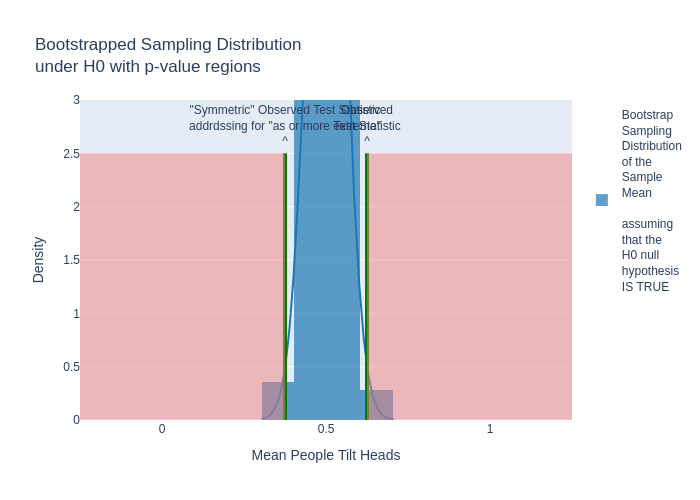

In [19]:
# figure for demonstration only: code details not of primary concern

hist_data = [IncreaseProportionSimulations_underH0random+np.random.uniform(-0.05,0.05,size=len(IncreaseProportionSimulations_underH0random))]
group_labels = ['Bootstrap<br>Sampling<br>Distribution<br>of the<br>Sample<br>Mean<br><br>assuming<br>that the<br>H0 null<br>hypothesis<br>IS TRUE']
fig = ff.create_distplot(hist_data, group_labels, curve_type='normal',
                         show_hist=True, show_rug=False, bin_size=0.1)
pv_y = 2.5
pv_y_ = .25
fig.add_shape(type="line", x0=observed_test_statistic, y0=0, 
              x1=observed_test_statistic, y1=pv_y,
              line=dict(color="Green", width=4), name="Observed Test Statistic")
fig.add_trace(go.Scatter(x=[observed_test_statistic], y=[pv_y+pv_y_], 
                         text=["Observed<br>Test Statistic<br>^"], mode="text", showlegend=False))
# "as or more extreme" also include the "symmetric" observed test statistic...
symmetric_test_statistic = population_parameter_value_under_H0 -\
                           abs(observed_test_statistic-population_parameter_value_under_H0)
fig.add_shape(type="line", x0=symmetric_test_statistic, y0=0, 
              x1=symmetric_test_statistic, y1=pv_y,
              line=dict(color="Green", width=4), name="Observed Test Statistic")
fig.add_trace(go.Scatter(x=[symmetric_test_statistic], y=[pv_y+pv_y_], 
                         text=['"Symmetric" Observed Test Statistic<br>addrdssing for "as or more extreme"<br>^'], mode="text", showlegend=False))

# Add a transparent rectangle for the lower extreme region
fig.add_shape(type="rect", x0=-0.25, y0=0, x1=symmetric_test_statistic, y1=pv_y,
              fillcolor="LightCoral", opacity=0.5, line_width=0)
# Add a transparent rectangle for the upper extreme region
fig.add_shape(type="rect", x0=observed_test_statistic, y0=0, x1=1.25, y1=pv_y,
              fillcolor="LightCoral", opacity=0.5, line_width=0)

# Update layout
fig.update_layout(
    title="Bootstrapped Sampling Distribution<br>under H0 with p-value regions",
    xaxis_title="Mean People Tilt Heads", yaxis_title="Density", yaxis=dict(range=[0, pv_y+2*pv_y_]))
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [21]:
# Calculate the p-value


observed_test_statistic = 0.625
simulated_test_statistics = IncreaseProportionSimulations_underH0random

# Be careful with "as or more extreme" as it's symmetric!
SimTestStats_as_or_more_extreme_than_ObsTestStat = \
    abs(simulated_test_statistics - population_parameter_value_under_H0) >= \
    abs(observed_test_statistic - population_parameter_value_under_H0)
    
p_value = (SimTestStats_as_or_more_extreme_than_ObsTestStat).sum() / number_of_simulations
print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated test statistics (under HO)\n",
      'that are "as or more extreme" than the observed test statistic: ',
      SimTestStats_as_or_more_extreme_than_ObsTestStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")

Number of Simulations: 10000

Number of simulated test statistics (under HO)
that are "as or more extreme" than the observed test statistic: 53

p-value
(= simulations "as or more extreme" / total simulations): 0.0053


since the p-value = 0.0053 < 0.01, we have strong evidence that the $H_0$ is false. Therefore, we reject the null hypothesis